# Regresja wielomianowa

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Zadanie 1
Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + \varepsilon,
$$
gdzie $\varepsilon\sim\mathcal{N}(\mu, \sigma)$.
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x+\varepsilon$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2+\varepsilon$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3+\varepsilon$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}+\varepsilon$,

**Wskazówka**: `smf.ols('y ~ x + I(x**k)', data_frame)` lub `PolynomialFeatures` z `sklearn.preprocessing`

In [ ]:
n = 100
x = stats.uniform.rvs(size = n,loc = -3, scale = 6)
eps = stats.norm.rvs(size = n, loc = 2,scale = 2)
y = x-2*(x**2)+0.5*(x**3)+eps

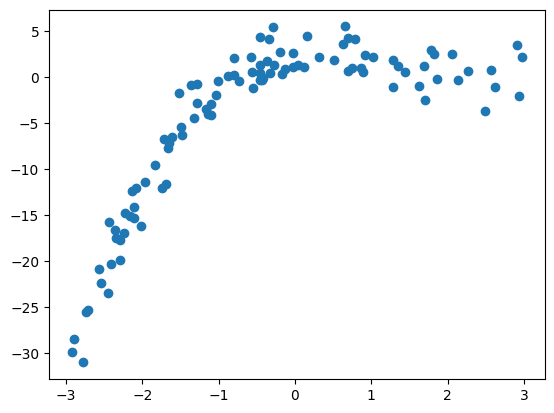

In [ ]:
plt.scatter(x,y)
#zależność mocno nieliniowa

In [ ]:
#regresja liniowa
x1 = x.reshape(-1,1)
lm1 = LinearRegression()
lm1.fit(x1,y)
lm1.score(x1,y)

0.5560689808680135

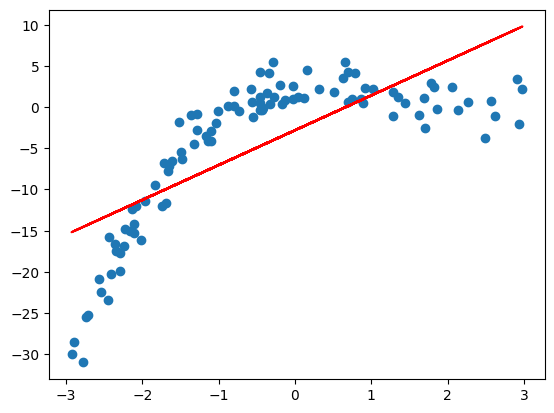

In [ ]:
plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red',label = 'degree=1')
#regresja liniowa słabo się dopasowuje

In [ ]:
#dopasowujemy wielomian stopnia 2
pipeline2 = make_pipeline(PolynomialFeatures(degree = 2,include_bias=False),LinearRegression())
pipeline2.fit(X = x1,y = y)
pipeline2.score(x1,y)

0.9145483070145147

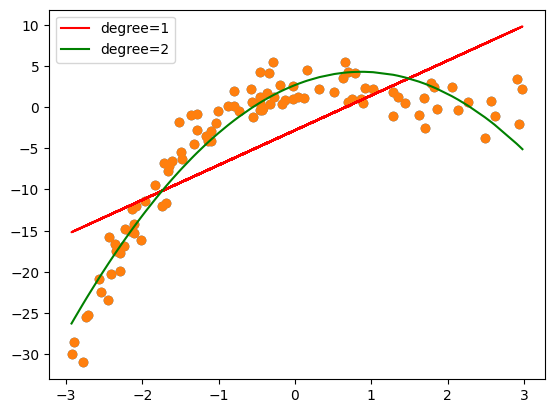

In [ ]:
import operator
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red',label = 'degree=1')

#o wiele lepiej dopasowane, ale na ogonach mogłoby być lepiej
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline2.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')
plt.legend()

In [ ]:
#dopasowujemy wielomian stopnia 3
pipeline3 = make_pipeline(PolynomialFeatures(degree = 3,include_bias=False),LinearRegression())
pipeline3.fit(X = x1,y = y)
pipeline3.score(x1,y)

0.9600147248204617

In [ ]:
#dopasowujemy wielomian stopnia 20
pipeline20 = make_pipeline(PolynomialFeatures(degree = 20,include_bias=False),LinearRegression())
pipeline20.fit(X = x1,y = y)
pipeline20.score(x1,y)

0.9655817625536016

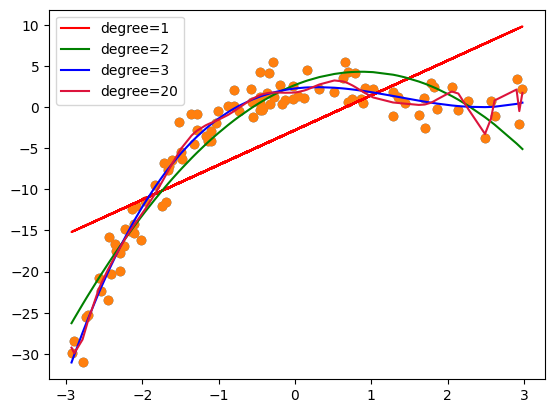

In [ ]:
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red',label = 'degree=1')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline2.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline3.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'blue',label = 'degree=3')


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline20.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'crimson',label = 'degree=20')
plt.legend()
#model 1,x,x^2,x^3 bardzo ładnie się dopasował
#model 1,x,x^2...,x^20 dopasował się aż za dobrze, mamy przeuczenie

### The Bias vs Variance trade-off

**Bias** (obciążenie) - odnosi się do błędu wynikającego z uproszczonych założeń modelu dotyczących dopasowania danych. Wysokie obciążenie oznacza, że model nie jest w stanie uchwycić wzorców w danych, co powoduje niedopasowanie/niedouczenie (ang. *under-fitting*).

**Variance** - odnosi się do błędu spowodowanego złożonym modelem próbującym dopasować dane. Duża wariancja oznacza, że model przechodzi przez większość punktów danych i powoduje nadmierne dopasowanie do danych (ang. *over-fitting).

Text(0.5, 0, 'Overfit\nLow bias\nHigh Variance')

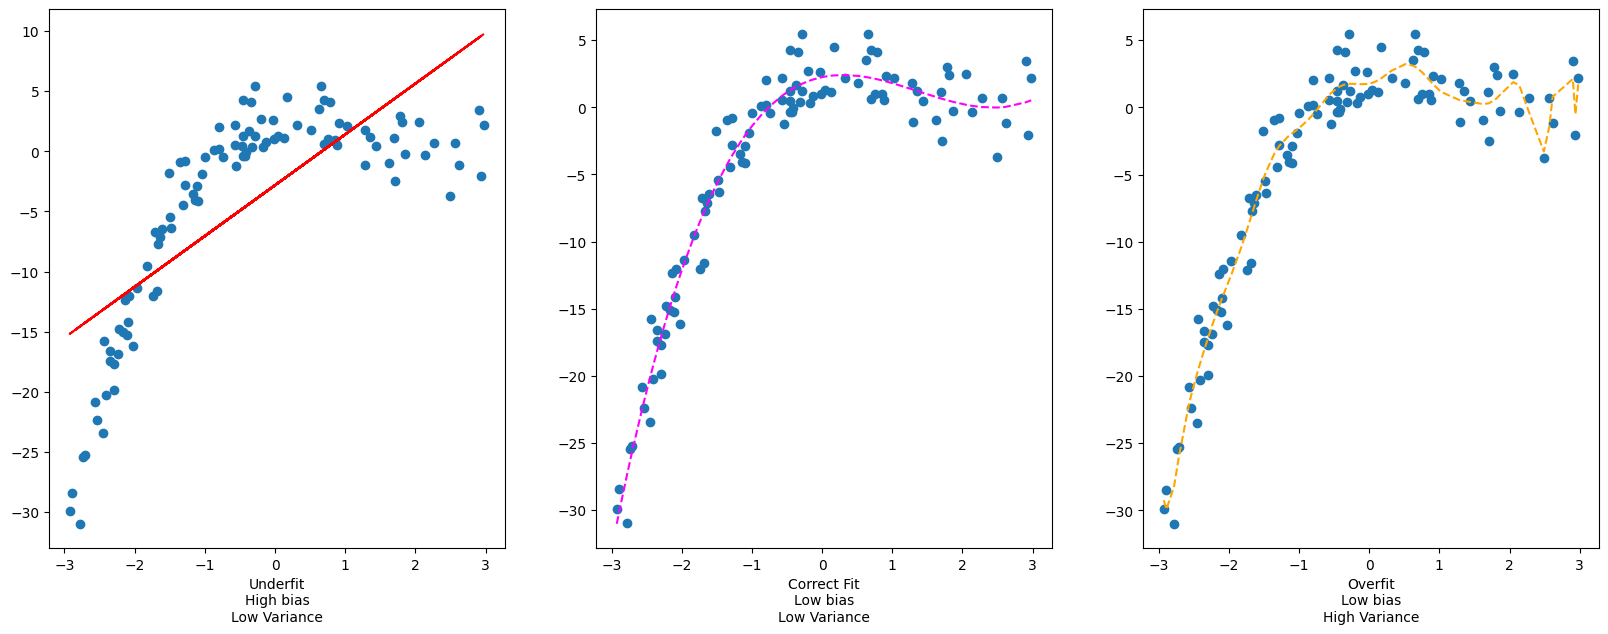

In [ ]:
# liniowa underfit
# 1,x,x^2,x^3 bardzo dobre dopasowanie
# 1,x,x^2,...,x^20 overfit
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].scatter(x, y)
ax[0].plot(x, lm1.predict(x1), '--', color='red', label="degree=1")
ax[0].set_xlabel("Underfit\nHigh bias\nLow Variance")

sorted_zip = sorted(zip(x, pipeline3.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[1].scatter(x, y)
ax[1].plot(x_range, y_poly_pred, '--', color='magenta', label="degree=3")
ax[1].set_xlabel("Correct Fit\nLow bias\nLow Variance")

sorted_zip = sorted(zip(x, pipeline20.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[2].scatter(x, y)
ax[2].plot(x_range, y_poly_pred, '--', color='orange', label="degree=20")
ax[2].set_xlabel("Overfit\nLow bias\nHigh Variance")

# Zadanie 2
Wczytaj dane `amazon_salaries.csv` opisujące wysokość rocznych zarobków (`Salary`) w zależności od zajmowanego stanowiska (`Level`).

Dopasuj model regresji liniowej oraz model regresji wielomianowej, znajdź najlepszy stopień wielomianu.

In [ ]:
amazon_salary = pd.read_csv("amazon_salaries.csv")

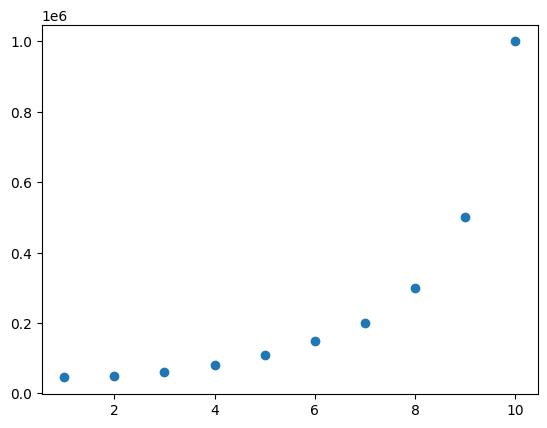

In [ ]:
x = amazon_salary.Level
y = amazon_salary.Salary

plt.scatter(x, y)

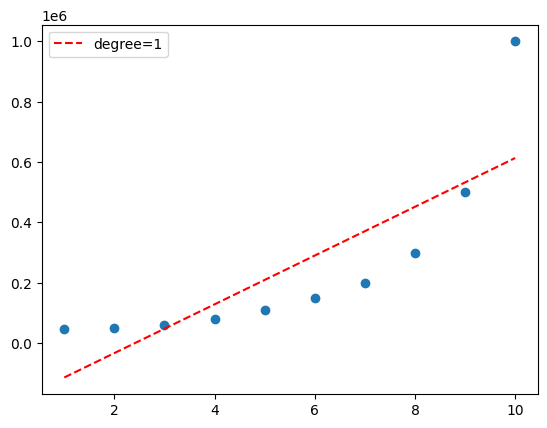

Degree=1, R2=0.6690412331929895


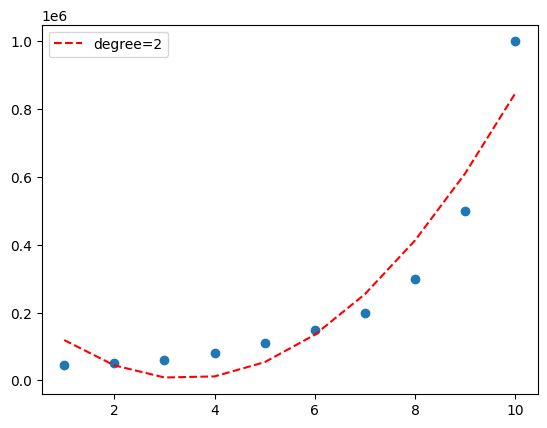

Degree=2, R2=0.9162082221443943


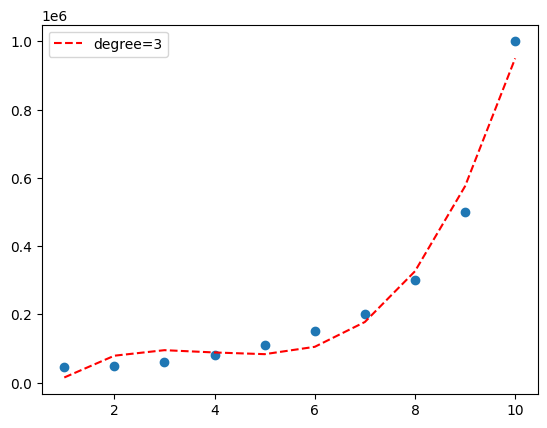

Degree=3, R2=0.9812097727913366


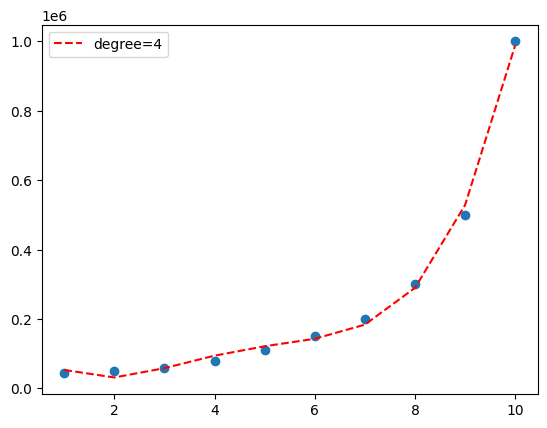

Degree=4, R2=0.9973922891706614


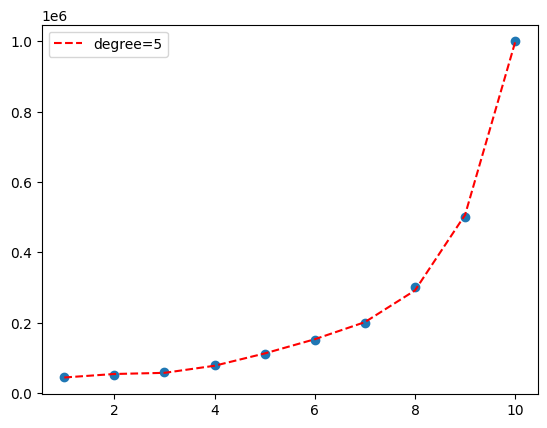

Degree=5, R2=0.9997969027099755


In [ ]:
plt.scatter(x, y)
x1 = np.array(x).reshape(-1,1)
lm1 = LinearRegression()
lm1.fit(x1,y)
plt.plot(x, lm1.predict(x1), '--', color='red', label="degree=1")
plt.legend()
plt.show()
print("Degree=1, R2={}".format(lm1.score(x1,y)))

for i in np.arange(2, 6):
    pipeline1 = make_pipeline(PolynomialFeatures(degree = i,include_bias=False),LinearRegression())
    lm  = pipeline1.fit(X = x1,y = y)
    lm.score(x1,y)
    plt.scatter(x, y)
    plt.plot(x, lm.predict(x1), '--', color='red', label="degree={}".format(i))
    plt.legend()
    plt.show()
    print("Degree={}, R2={}".format(i, lm.score(x1,y)))
    #im większy stopień wielomianu tym lepsze dopasowanie

In [ ]:
#cięzko jednoznacznie stwierdzić, który stopień wielomianu wziąć, może 4, może 5 stopnia
# przydałby sie zbiór testowy (inne stanowiska z zarobkami)